# Customer Churn Prediction


#### Name: Urja Kumari 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [108]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy

In [143]:
import pickle

## Load Dataset

In [3]:
df= pd.read_excel('customer_churn_large_dataset.xlsx')

### Understand the Dataset

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#### Check if the Dataset contains Null values

In [64]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
df['Location'].nunique()

5

In [9]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [10]:
df['Total_Usage_GB'].nunique()

451

## Data Visualisation

### Check the number of 'Churned' and 'Not Churned'

<Axes: xlabel='Churn', ylabel='count'>

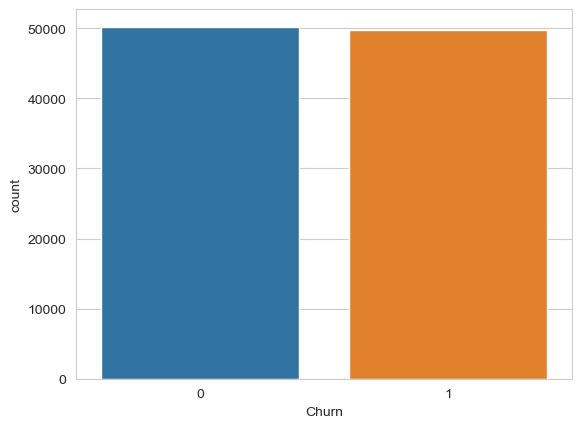

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Churn', data=df)

### Check Values of Length of Subscription Months 

C:\Users\ishid\AppData\Local\Temp\ipykernel_9692\761518506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Subscription_Length_Months'])


<Axes: xlabel='Subscription_Length_Months', ylabel='Density'>

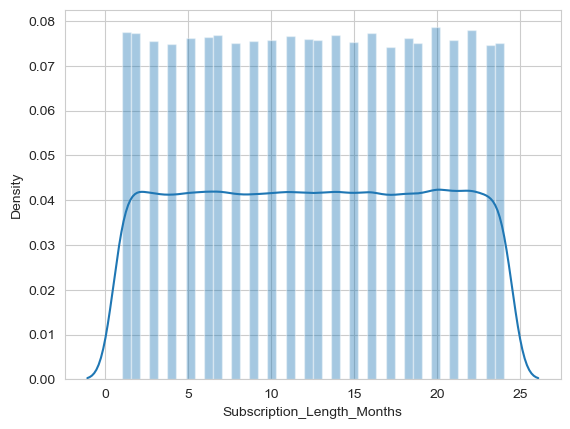

In [19]:
sns.distplot(df['Subscription_Length_Months'])

### Check Values of Length of Subscription Months Distinguishing Between 'Churned' and 'Not Churned'

C:\Users\ishid\AppData\Local\Temp\ipykernel_9692\4172624701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==1]['Subscription_Length_Months'], color='blue',label='Churned-Length Months')
C:\Users\ishid\AppData\Local\Temp\ipykernel_9692\4172624701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

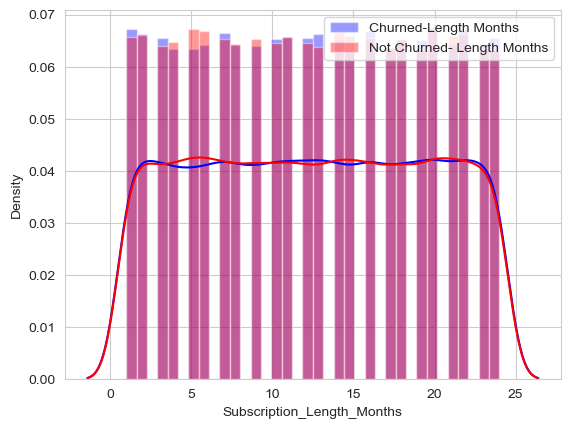

In [28]:
sns.distplot(df[df['Churn']==1]['Subscription_Length_Months'], color='blue',label='Churned-Length Months')
sns.distplot(df[df['Churn']==0]['Subscription_Length_Months'], color='red', label='Not Churned- Length Months')
plt.legend()


### Check Frequency of Total Data Usage

C:\Users\ishid\AppData\Local\Temp\ipykernel_9692\2359405427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Usage_GB'], bins=50)


<Axes: xlabel='Total_Usage_GB', ylabel='Density'>

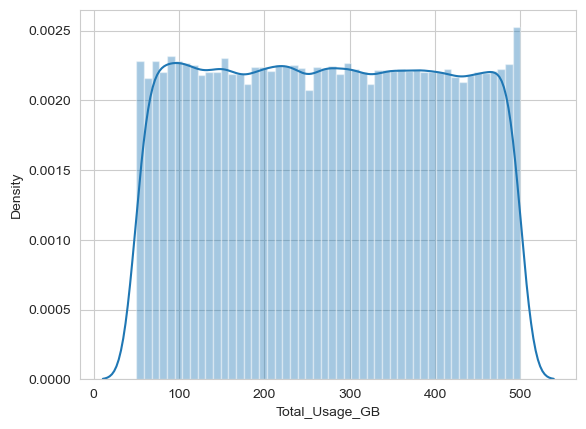

In [29]:
sns.distplot(df['Total_Usage_GB'], bins=50)

### Check the Data Usage Based on Churned and Not-Churned number of Customers

C:\Users\ishid\AppData\Local\Temp\ipykernel_9692\3814610440.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==1]['Total_Usage_GB'], color='blue',label='Churned-Data Usage')
C:\Users\ishid\AppData\Local\Temp\ipykernel_9692\3814610440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

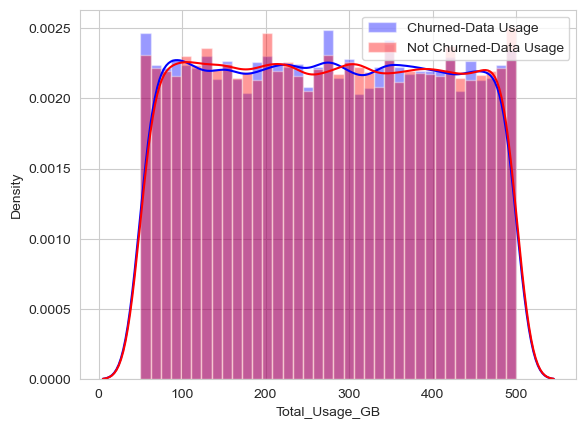

In [30]:
sns.distplot(df[df['Churn']==1]['Total_Usage_GB'], color='blue',label='Churned-Data Usage')
sns.distplot(df[df['Churn']==0]['Total_Usage_GB'], color='red', label='Not Churned-Data Usage')
plt.legend()

### Determine the Count of Male and Female

<Axes: xlabel='Gender', ylabel='count'>

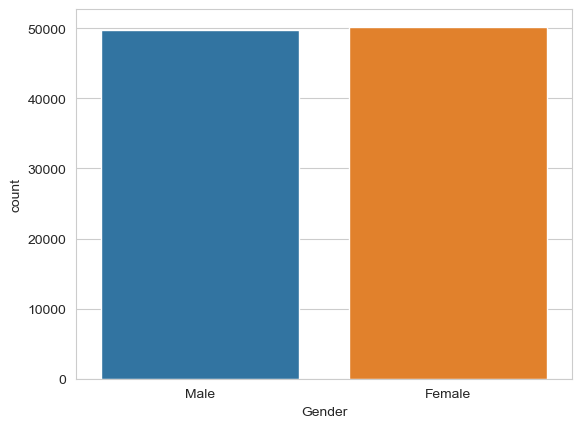

In [31]:
sns.countplot(x='Gender', data=df)

### Check if the Number of Churned and Not-Churned Customers could be distinguished based on the Gender.

<Axes: xlabel='Gender', ylabel='count'>

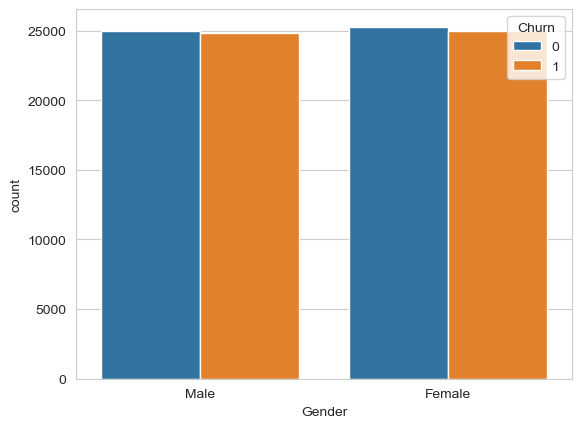

In [32]:
sns.countplot(x='Gender', data=df, hue='Churn')

### Check the Monthly Bill Distribution for Churned and Not-Churned Customers

<Axes: xlabel='Churn', ylabel='Monthly_Bill'>

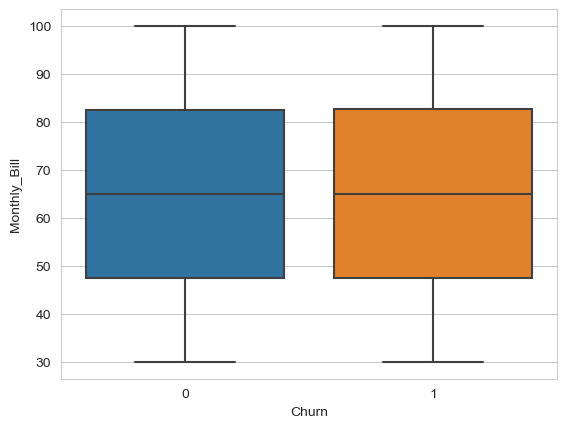

In [33]:
sns.boxplot(x='Churn', y='Monthly_Bill', data=df)

### Check the Monthly Bill for Churned and Not-Churned Based on the Gender

<Axes: xlabel='Churn', ylabel='Monthly_Bill'>

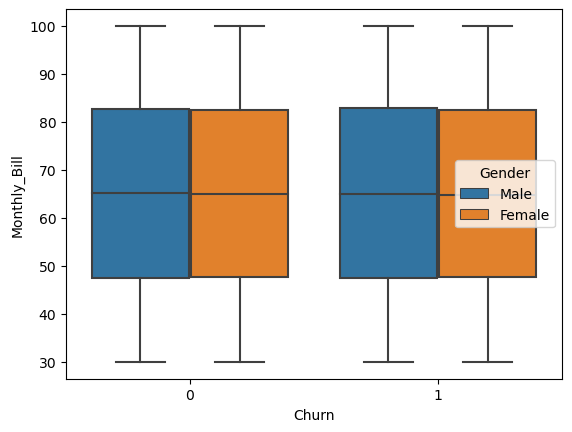

In [33]:
sns.boxplot(x='Churn', y='Monthly_Bill', data=df, hue='Gender')

### Check the Total Data Usage for Churned and Not-Churned Based on the Gender

<Axes: xlabel='Churn', ylabel='Total_Usage_GB'>

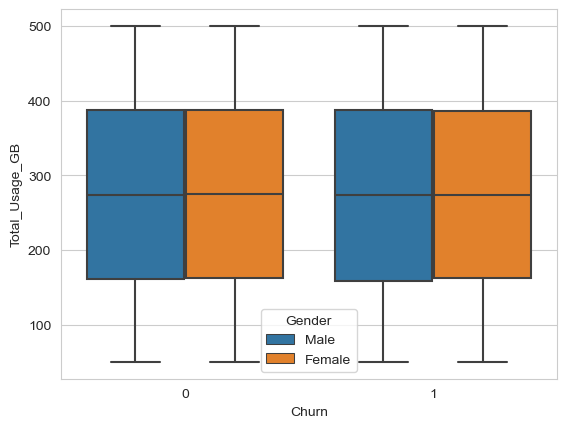

In [34]:
sns.boxplot(x='Churn', y='Total_Usage_GB', data=df, hue='Gender')

### Count of Churn and Not Churn Customers from Different Locations

<Axes: xlabel='Churn', ylabel='Age'>

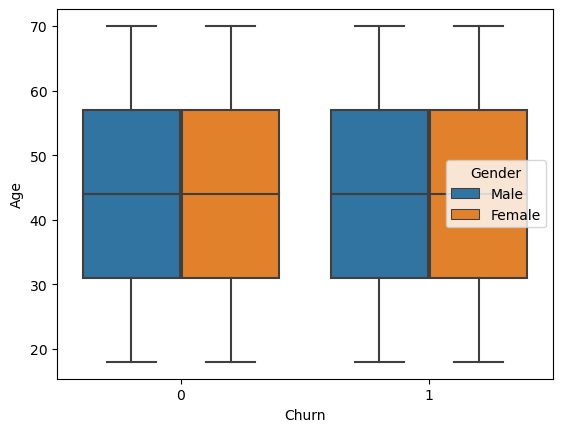

In [43]:
sns.boxplot(x='Churn', y='Age', data=df, hue='Gender')

<Axes: xlabel='Location', ylabel='count'>

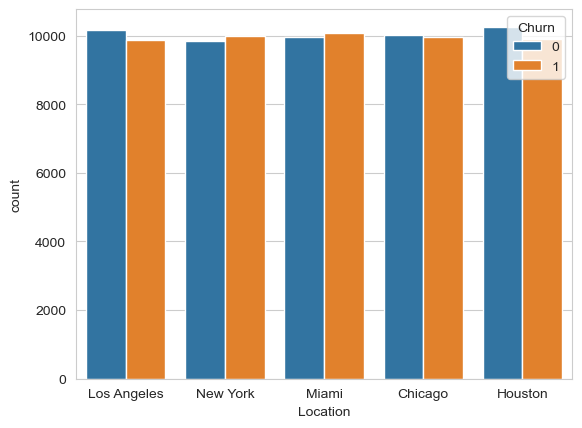

In [35]:
sns.countplot(x='Location', data=df, hue='Churn')

### Check if there is any linear relationship between Total Data Usage and the Monthly Bill and based on Churned and Not-Churned.

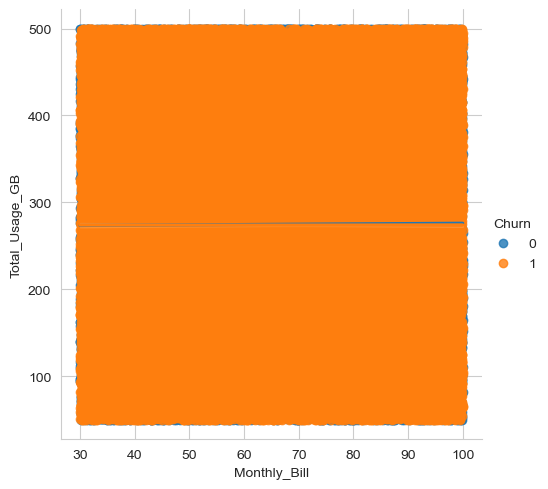

In [39]:
sns.lmplot(x='Monthly_Bill', y ='Total_Usage_GB', data=df, hue='Churn')

### A Pairplot to Check Relationship between every Combination of variables Based on Churned or Not-Churned.

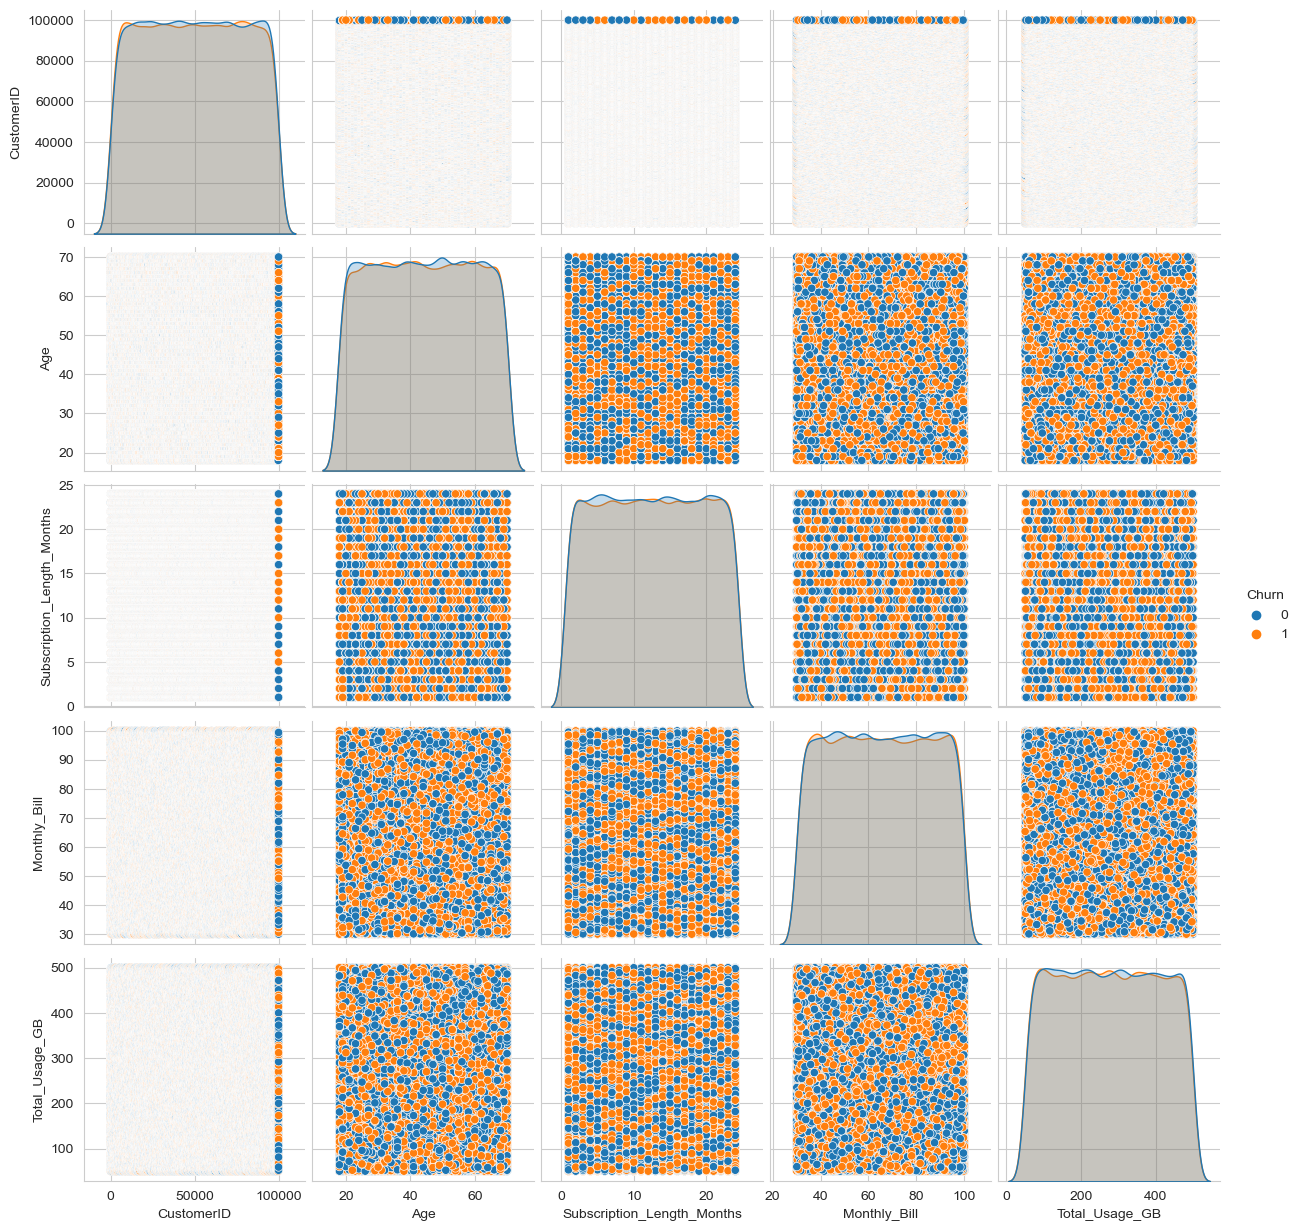

In [40]:
sns.pairplot(data=df, hue='Churn')

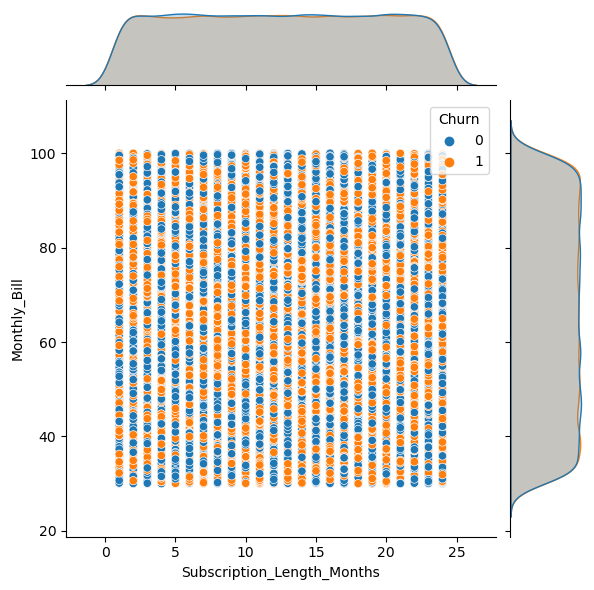

In [37]:
sns.jointplot(x='Subscription_Length_Months', y='Monthly_Bill', data=df, hue='Churn')

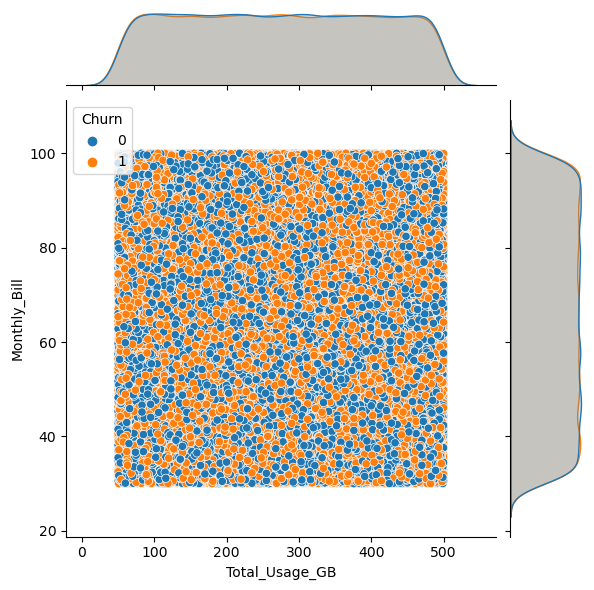

In [38]:
sns.jointplot(x='Total_Usage_GB', y='Monthly_Bill', data=df, hue='Churn')

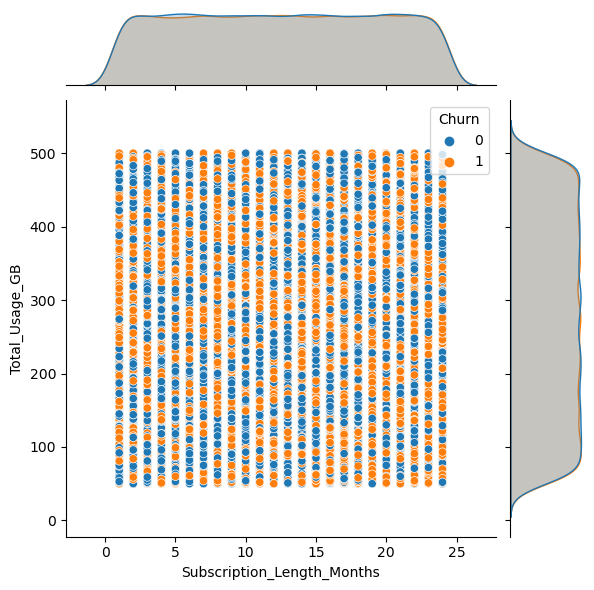

In [39]:
sns.jointplot(x='Subscription_Length_Months',y='Total_Usage_GB', data=df, hue='Churn')

## Deduction from Data Visualisation:

The Dataset seems to be completely balanced along each feature and there is no inherent relationship between different features, even the combination of features which are expected to be related. The data seems to be random and balanced along each combination of categories possible. Therefore it will be difficult for any machine learning algorithm to predict the target due to the incapability to find any insight or pattern from the data.

## Data Preprocessing

‘Gender’ consists of categorical values namely ‘Male’ and ‘Female’ so it is one hot encoded to form two columns with names ‘Male and ‘Female’ consisting of values 0 and 1.

In [41]:
Gender = pd.get_dummies(df['Gender'])

‘Location’ consists of five categorical values so it is one hot encoded to form 5 columns namely ‘Houston’, ‘New York’, ‘Chicago’, ‘Los Angeles’, and ‘Miami’ containing values either 0 and 1.

In [43]:
Location = pd.get_dummies(df['Location'])

The three datasets: Original Dataset, newly formed Gender dataframe, and newly formed Location dataframe are concatenated.

In [44]:
df = pd.concat([df, Gender, Location], axis=1)

Features ‘CustomerID’ and ‘Name’ (along with the original contained features 'Gender' and 'Location') are dropped from the dataset since they are just a representation of record entries and could not be useful in target value prediction.

In [46]:
df.drop(['Name', 'CustomerID','Gender','Location'], axis=1, inplace=True)

#### Check the PreProcessed Dataset

In [47]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0


## Split the Dataset

#### Split the Dataset into two sets: X containing all the Independent Features and Y containg the Dependent Feature. 

In [48]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [49]:
X

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,1,0,0,1,0,0
1,62,1,48.76,172,1,0,0,0,0,0,1
2,24,5,85.47,460,1,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,0,1,0
4,46,19,58.14,266,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,0,1,0,1,0,0,0
99996,62,19,61.65,351,1,0,0,0,0,0,1
99997,64,17,96.11,251,0,1,1,0,0,0,0
99998,51,20,49.25,434,1,0,0,0,0,0,1


### Create another kind of Dataset where X consists of all the independent features containing Continuous values and Y consisting of the Dependent feature.  

In [50]:
X_diff = df[['Age', 'Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
Y_diff = df['Churn']

In [51]:
X_diff

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,17,73.36,236
1,62,1,48.76,172
2,24,5,85.47,460
3,36,3,97.94,297
4,46,19,58.14,266
...,...,...,...,...
99995,33,23,55.13,226
99996,62,19,61.65,351
99997,64,17,96.11,251
99998,51,20,49.25,434


### Train Dataset-1

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train Dataset-2

In [54]:
x_train_diff, x_test_diff, y_train_diff, y_test_diff = train_test_split(X_diff, Y_diff, test_size=0.33, random_state=42)

# Model Implementation

There are different Supervised Machine Learning Models like Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine that have been implemented on the Dataset-1(Along with Hypertuning and Cross-Validation). Then the accuracy obtained through each model is compared to get the best model for prediction.

## Logistic Regression on Dataset-1

In [55]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [56]:
predictions = logmodel.predict(x_test)

In [60]:
print(confusion_matrix(y_test, predictions))

[[9781 6857]
 [9541 6821]]


In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.59      0.54     16638
           1       0.50      0.42      0.45     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000



In [62]:
print(accuracy_score(y_test, predictions))

0.5030909090909091


## Logistic Regression on Dataset-2

In [63]:
lm = LogisticRegression()
lm.fit(x_train_diff, y_train_diff)

LogisticRegression()

In [64]:
predictions_diff = lm.predict(x_test_diff)

In [65]:
print(confusion_matrix(y_test_diff, predictions_diff))

[[10376  6262]
 [10310  6052]]


In [66]:
print(classification_report(y_test_diff, predictions_diff))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56     16638
           1       0.49      0.37      0.42     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.49     33000
weighted avg       0.50      0.50      0.49     33000



In [67]:
print(accuracy_score(y_test_diff, predictions_diff))

0.4978181818181818


#### Dataset-2 consisting of features containing continuous values does not seem to offer any benefits in comparison to the original dataset, i.e, Dataset-1 hence from now on we will be continuing with the implementation of different models on only Dataset-1 and not on Dataset-2

## Implement If Cross Validation can Improve Accuracy: 

In [68]:
num_splits= 10
kf = KFold(n_splits=num_splits)

In [71]:
# Iterate through splits

accuracy_value =[]
for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    x_train_cross = train_data.drop(['Churn'],axis=1)  # Your feature columns
    y_train_cross = train_data['Churn']  # Your target column
    
    x_test_cross = test_data.drop(['Churn'], axis=1)  # Your feature columns
    y_test_cross = test_data['Churn'] 
    
    lm_model = LogisticRegression()
    lm_model.fit(x_train_cross, y_train_cross)
    predictions_cross = lm_model.predict(x_test_cross)
    accuracy = accuracy_score(y_test_cross, predictions_cross)
    accuracy_value.append(accuracy)
    
average_accuracy = np.mean(accuracy_value)
print(average_accuracy)

0.49938000000000005


### Even Cross Validation does not seem to improve the accuracy and we know that its because there is no pattern in the data that the model could learn so it is left to probably random guessing and hence accuracy sticks around 50%

## K-Nearest Neighbor

Its important to determine the number of neighbors we use to predict the target variable since it can affect the accuracy of our prediction. Here I have first implemented the model considering a Base case where the numbe rof neighbors assumed is 1. Then the Elbow Method in order to determine the best value of K.

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
predictions= knn.predict(x_test)

In [74]:
print(confusion_matrix(y_test, predictions))

[[8377 8261]
 [8240 8122]]


In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000



In [77]:
print(accuracy_score(y_test, predictions))

0.49996969696969695


### Determining Best k- value Using Elbow Method

In [80]:
error_rate=[]
for k in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    error_rate.append(np.mean(y_test != predictions))

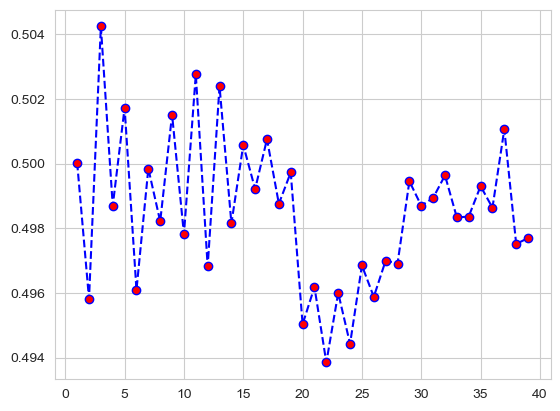

In [81]:
plt.plot(range(1,40), error_rate, color='blue', linestyle='--',marker='o', markerfacecolor='red')

### Use K=22   As it gives the least error.

In [82]:
# k=20
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [83]:
predictions= knn.predict(x_test)

In [85]:
print(confusion_matrix(y_test, predictions))

[[9941 6697]
 [9600 6762]]


In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55     16638
           1       0.50      0.41      0.45     16362

    accuracy                           0.51     33000
   macro avg       0.51      0.51      0.50     33000
weighted avg       0.51      0.51      0.50     33000



In [87]:
print(accuracy_score(y_test, predictions))

0.5061515151515151


#### Although the accuracy improved with the new value of K, it was still not good enough than random guessing.


## Decision Tree Classifier

In [128]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [129]:
predictions = dtree.predict(x_test)

In [130]:
predictions

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [131]:
print(confusion_matrix(y_test, predictions))

[[8422 8216]
 [8292 8070]]


In [132]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51     16638
           1       0.50      0.49      0.49     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000



In [133]:
print(accuracy_score(y_test, predictions))

0.49975757575757573


## Random Forest Classifier

In [109]:
ran_forest = RandomForestClassifier(n_estimators=100)
ran_forest.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
predictions= ran_forest.predict(x_test)

In [111]:
print(confusion_matrix(y_test, predictions))

[[8620 8018]
 [8541 7821]]


In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     16638
           1       0.49      0.48      0.49     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000



In [113]:
print(accuracy_score(y_test, predictions))

0.4982121212121212


## Random Forest HyperParameter Tuning:

In [124]:
param_grid ={
    'n_estimators': [100,200, 300],
    'max_depth' : [None, 10, 20, 30]
}

In [125]:
rf = RandomForestClassifier(random_state=42)

In [126]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose=2)

In [134]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=  25.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=  25.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=  25.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=  25.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=  24.8s
[CV] END ...................max_depth=None, n_estimators=200; total time=  51.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=  50.6s
[CV] END ...................max_depth=None, n_estimators=200; total time=  54.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=  50.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=  49.9s
[CV] END ...................max_depth=None, n_estimators=300; total time= 1.2min
[CV] END ...................max_depth=None, n_es

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [135]:
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}


### Random Forest Using Determined Parameters

In [136]:
ran_newforest = RandomForestClassifier(n_estimators=100,max_depth=10)
ran_newforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [138]:
predictions= ran_newforest.predict(x_test)

In [139]:
print(confusion_matrix(y_test, predictions))

[[9083 7555]
 [8866 7496]]


In [140]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53     16638
           1       0.50      0.46      0.48     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000



In [141]:
print(accuracy_score(y_test, predictions))

0.5023939393939394


## Support Vector Machine

In [142]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(x_train, y_train)

SVC()

In [144]:
predictions = support_vector.predict(x_test)

In [145]:
print(confusion_matrix(y_test, predictions))

[[12741  3897]
 [12573  3789]]


In [146]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.77      0.61     16638
           1       0.49      0.23      0.32     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.46     33000
weighted avg       0.50      0.50      0.46     33000



In [147]:
print(accuracy_score(y_test, predictions))

0.5009090909090909


In [148]:
score =support_vector.score(x_test, y_test)
score

0.5009090909090909

## Artificial Neural Network 

In [99]:
D= X.shape[1]

In [100]:
i = Input(shape=(D,))
out = Dense(32,activation='relu')(i)
out = Dense(64, activation='relu')(out)
out = Dense(128, activation='relu')(out)
out = Dense(1, activation='sigmoid')(out)

model = Model(i,out)

In [102]:
model.compile(optimizer='Adam',
             loss ='binary_crossentropy',
             metrics=['Accuracy'])

In [103]:
r = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=30)

Epoch 1/30
2094/2094 [==============================] - 8s 3ms/step - loss: 0.7374 - Accuracy: 0.5012 - val_loss: 0.7040 - val_Accuracy: 0.4938
Epoch 2/30
2094/2094 [==============================] - 5s 3ms/step - loss: 0.6994 - Accuracy: 0.5008 - val_loss: 0.6940 - val_Accuracy: 0.5038
Epoch 3/30
2094/2094 [==============================] - 6s 3ms/step - loss: 0.6943 - Accuracy: 0.5040 - val_loss: 0.6934 - val_Accuracy: 0.5039
Epoch 4/30
2094/2094 [==============================] - 6s 3ms/step - loss: 0.6935 - Accuracy: 0.5017 - val_loss: 0.6934 - val_Accuracy: 0.5045
Epoch 5/30
2094/2094 [==============================] - 6s 3ms/step - loss: 0.6934 - Accuracy: 0.5024 - val_loss: 0.6933 - val_Accuracy: 0.4956
Epoch 6/30
2094/2094 [==============================] - 6s 3ms/step - loss: 0.6933 - Accuracy: 0.5006 - val_loss: 0.6932 - val_Accuracy: 0.5041
Epoch 7/30
2094/2094 [==============================] - 6s 3ms/step - loss: 0.6933 - Accuracy: 0.5006 - val_loss: 0.6931 - val_Accuracy:

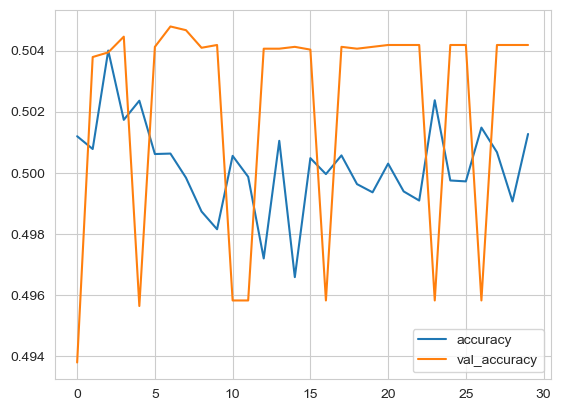

In [107]:
plt.plot(r.history['Accuracy'], label='accuracy')
plt.plot(r.history['val_Accuracy'], label='val_accuracy')
plt.legend()

## Save the Best Performing Model For Model Deployment

In [149]:
filename='Predict_Churn.pkl'

In [150]:
pickle.dump(support_vector, open(filename,'wb'))

In [151]:
load_model = pickle.load(open(filename, 'rb'))
print(load_model.score(x_test,y_test))

0.5009090909090909
